Importing Libraries

In [ ]:
import numpy as np  # for matrix multiplication
import pandas as pd # for reading CSV
import seaborn as sns # plot 
import matplotlib.pyplot as plt #importing graph
import statistics as st # for mean and std function,to remove outlier
from sklearn import metrics
from scipy import stats
from tqdm.notebook import tqdm_notebook

Reading file using Pandas library

In [ ]:
col_names = ['Area', 'Price']
# reading CSV using pandas
# header is the number of rows you want to skip from the top when reading the data
df = pd.read_csv("task01.csv",header = 0, names=col_names) 
# df=np.array(df)  ese bhi convert kar sakte
# df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df)               

       Area   Price
0      8450  208500
1      9600  181500
2     11250  223500
3      9550  140000
4     14260  250000
...     ...     ...
1455   7917  175000
1456  13175  210000
1457   9042  266500
1458   9717  142125
1459   9937  147500

[1460 rows x 2 columns]


Complete Data Report using Profile Report

In [ ]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(df)
# profile.to_file("report.html")

In [ ]:
X = df.Area 
print(X)

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: Area, Length: 1460, dtype: int64


In [ ]:
Y = df.Price 
print(Y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64


In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
X.shape

(1460,)

In [ ]:
X = X.reshape(-1,1) # 
X.shape

(1460, 1)

In [ ]:
Y = Y.reshape(-1,1)
Y.shape

(1460, 1)

Splitting Data without Sklearn Library.
Using Numpy to split data into train, test and validation set

In [ ]:
def split(A):
  A_start_train = 0
  A_end_train = int(len(A)*0.70)

  A_start_test = A_end_train
  A_end_test = A_end_train + int(len(A)*0.15)

  A_start_val = A_end_test
  A_end_val = A_end_test +int(len(A)*0.15)

  A_train = A[A_start_train:A_end_train,:]
  A_test = A[A_start_test:A_end_test,:]
  A_val = A[A_start_val:A_end_val,:]
  return A_train , A_test, A_val

In [ ]:
x_train, x_test,val_set_x = split(X)
y_train, y_test,val_set_y = split(Y)

In [ ]:
def loss_func(y_true, y_pred):                          
  return np.square(np.subtract(y_true, y_pred)).mean()  # 1/2m is mean basically so we can use mean function  

# Gradient Descent
1- tqdm_notebook shows progress of for loop iterations

In [ ]:
def grad_descent(epochs):
  lr = 0.0000000001  # data mein variation kam ho tu learning rate zada karna chahiya
  m = np.random.rand()
  c = np.random.rand()
  cost_hist = []
  cost_hist_val = []
  n = len(x_train)
  # m weights and c bias 
  # m features sai mult 
  # c add hota tu bias hai
  for epoch in tqdm_notebook(range(epochs)):
    y_pred = x_train.dot(m) + c                       # getting predicted target value from current m ,c value
    D_c = (1/n) * np.sum(y_pred - y_train)     #  derivative of loss function with respect of m 
    D_m = (1/n) * np.sum((y_pred - y_train)*x_train) #  derivative of loss function with respect of m
    m = m - lr*D_m  # updating m (slope)
    c = c - lr*D_c  # updating c (y-intercept)
    cost_train = loss_func(y_train, y_pred)
    cost_hist.append(cost_train)
    y_pred_val = val_set_x.dot(m) + c                       
    cost_val = loss_func(val_set_y,y_pred_val)
    cost_hist_val.append(cost_val)
  return m,c,cost_hist, cost_hist_val
  # derivative of loss wrt to weights matlab ye mere change in weights ki waja sai loss mein kitna farq aya hai


In [ ]:
epochs= 500
m,c, cost_hist_train ,cost_hist_val = grad_descent(epochs)
print(m,c)

  0%|          | 0/500 [00:00<?, ?it/s]

9.012325327528268 0.012175182958599012


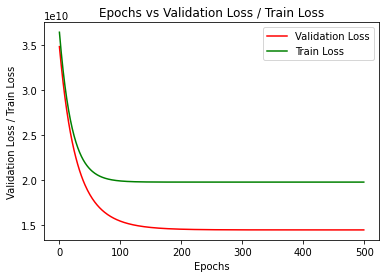

In [ ]:
# Plot the epoch vs training and validation loss using matplotlib.
plt.plot(list(range(epochs)),cost_hist_val, label = "Validation Loss", color="r" )
plt.plot(list(range(epochs)),cost_hist_train, label = "Train Loss",  color="g" )
plt.title("Epochs vs Validation Loss / Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss / Train Loss")
plt.legend()
plt.show()
# graph mein nazar arha hai validation loss boht kam hai training loss sai. Isila hume pata chal raha hai abhi tak humara model 
# overfit nahi hua aur bilkul sahi chal raha hai

Test Loss is 13594716783.098234


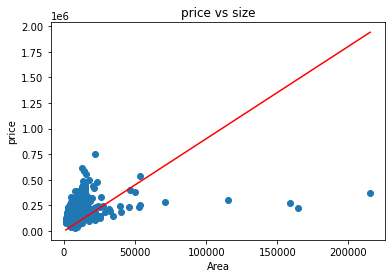

In [ ]:
# Plot the training data with linear regression fit and find test loss.
y_pred_test = m*x_test +c
cost_test = loss_func(y_test,y_pred_test)
print(f"Test Loss is {cost_test}")
y_pred = m*x_train +c
plt.scatter(x_train,y_train)
plt.title("price vs size")
plt.plot([min(x_train),max(x_train)],[min(y_pred),max(y_pred)], color = "r")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

In [ ]:
col_names = ['Area', 'Bedroom','Kitchen', 'YearBuilt','Price']
df2 = pd.read_csv("task02.csv",header = 0, names=col_names)
# df2=df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)] 
df2.shape

(1460, 5)

Feature Normalization is done by substracting data from its mean and dividing by standard deviation

In [ ]:
def feature_normalization(A):
  return (np.subtract(A,A.mean())/ np.std(A)) 

In [ ]:
def get_normalized_features(X1, X2, X3, X4,Y):
  x1_norm = feature_normalization(X1) 
  x2_norm = feature_normalization(X2) 
  x3_norm = feature_normalization(X3) 
  x4_norm = feature_normalization(X4)
  y_norm  = feature_normalization(Y)
  return x1_norm, x2_norm , x3_norm,x4_norm, y_norm 

In [ ]:
X1= df2.Area      # Getting all Area rows in X1
X2= df2.Bedroom   # Getting all Bedroom rows in X2
X3= df2.Kitchen   # Getting all Kitchen rows in X3
X4= df2.YearBuilt # Getting all Year Built rows in X4
Y = df2.Price     # Getting all Price rows in Y
X1= X1.to_numpy()     
X2= X2.to_numpy()   
X3= X3.to_numpy() 
X4= X4.to_numpy() 
Y = Y.to_numpy()  
X1,X2, X3,X4, Y = get_normalized_features(X1, X2, X3,X4, Y)

In [ ]:
X1 = X1.reshape(-1,1)  
X2 = X2.reshape(-1,1)  
X3 = X3.reshape(-1,1)  
X4 = X4.reshape(-1,1)  
Y = Y.reshape(-1,1)    

In [ ]:
X1.shape

(1460, 1)

In [ ]:
def get_data_sets():
  x1_train, x1_test, val_set_x1 = split(X1)
  x2_train, x2_test, val_set_x2 = split(X2)
  x3_train, x3_test, val_set_x3 = split(X3)
  x4_train, x4_test, val_set_x4 = split(X4)
  y_train, y_test, val_set_y = split(Y)
  return x1_train, x1_test, val_set_x1, x2_train, x2_test, val_set_x2,x3_train, x3_test, val_set_x3,x4_train, x4_test, val_set_x4, y_train, y_test,val_set_y

In [ ]:
x1_train, x1_test, val_set_x1, x2_train, x2_test, val_set_x2,x3_train, x3_test, val_set_x3,x4_train, x4_test, val_set_x4, y_train, y_test,val_set_y = get_data_sets()

In [ ]:
def multi_grad_descent(epochs):
  lr = 0.001  # data mein variation kam ho tu learning rate zada karna chahiya
  m1 = np.random.rand()   #0.00000000001
  m2 = np.random.rand()   #0.001
  m3 = np.random.rand()
  m4 = np.random.rand()
  c = np.random.rand()
  cost_hist = []
  cost_hist_val = []
  n1 = len(x1_train)
  n2 = len(x2_train)
  n3 = len(x3_train)
  n4 = len(x4_train)
  for epoch in tqdm_notebook(range(epochs)):
    y_pred = c + m1*x1_train + m2*x2_train + m3*x3_train + m4*x4_train   # getting predicted target value from current m ,c value
    # derivative of loss function with respect of am 
    D_c = (1/n1) * np.sum(y_pred - y_train)     
    #Derivatinves of Features
    D_m1 = (1/n1) * np.sum((y_pred - y_train)*x1_train) #  derivative of loss function with respect of m
    D_m2 = (1/n2) * np.sum((y_pred - y_train)*x2_train) #  derivative of loss function with respect of m
    D_m3 = (1/n3) * np.sum((y_pred - y_train)*x3_train) #  derivative of loss function with respect of m
    D_m4 = (1/n4) * np.sum((y_pred - y_train)*x4_train) #  derivative of loss function with respect of m
    m1 = m1 - lr*D_m1  # updating m1 (slope)
    m2 = m2 - lr*D_m2  # updating m2 (slope)
    m3 = m3 - lr*D_m3  # updating m3 (slope)
    m4 = m4 - lr*D_m4  # updating m4 (slope)
    c = c - lr*D_c     # updating c (y-intercept)
    cost_train = loss_func(y_train, y_pred)
    cost_hist.append(cost_train)
    y_pred_val = c + m1*val_set_x1 + m2*val_set_x2 + m3*val_set_x2 + m4*val_set_x4                       
    cost_val = loss_func(val_set_y,y_pred_val)
    cost_hist_val.append(cost_val)
  return m1, m2,m3,m4,c,cost_hist, cost_hist_val
  # derivative of loss wrt to weights matlab ye mere change in weights ki waja sai loss mein kitna farq aya hai


In [ ]:
epochs = 1500  # 1500 without norm
m1,m2,m3,m4,c, cost_hist_train ,cost_hist_val = multi_grad_descent(epochs)
print(m1, m2, m3 , m4,c)

  0%|          | 0/1500 [00:00<?, ?it/s]

0.1694523584566156 0.3295641280885772 0.03828048726772899 0.624941606729964 0.06274005884809203


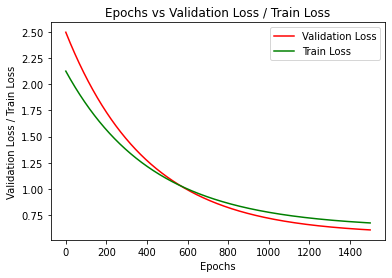

In [ ]:
# Plot the epoch vs training and validation loss using matplotlib.
plt.plot(list(range(epochs)),cost_hist_val, label = "Validation Loss", color="r" )
plt.plot(list(range(epochs)),cost_hist_train, label = "Train Loss",  color="g" )
plt.title("Epochs vs Validation Loss / Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss / Train Loss")
plt.legend()
plt.show()
# graph mein nazar arha hai validation loss boht kam hai training loss sai. Isila hume pata chal raha hai abhi tak humara model 
# overfit nahi hua aur bilkul sahi chal raha hai